In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
full=train_data.append(test_data,ignore_index=True)

In [5]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


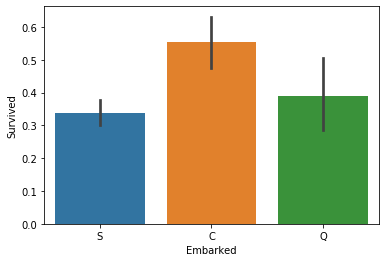

In [7]:
sns.barplot(data=train_data,x='Embarked',y='Survived')

In [8]:
print('Embarked is S, Survivied rate is %.2f' %full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)[1])

Embarked is S, Survivied rate is 0.34


In [9]:
full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)

0.0    0.663043
1.0    0.336957
Name: Survived, dtype: float64

In [10]:
full['Survived'][full['Embarked']=='S']

0       0.0
2       1.0
3       1.0
4       0.0
6       0.0
       ... 
1300    NaN
1303    NaN
1304    NaN
1306    NaN
1307    NaN
Name: Survived, Length: 914, dtype: float64

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


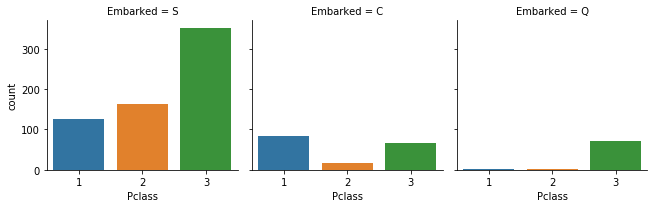

In [11]:
sns.factorplot('Pclass',col='Embarked',data=train_data,kind='count',size=3)

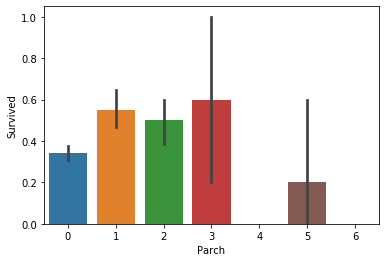

In [12]:
sns.barplot(data=train_data,x='Parch',y='Survived')

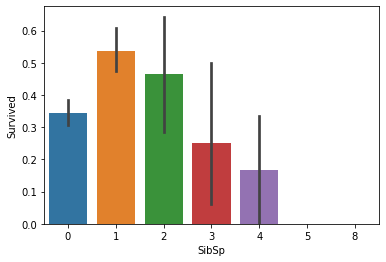

In [13]:
sns.barplot(data=train_data,x='SibSp',y='Survived')

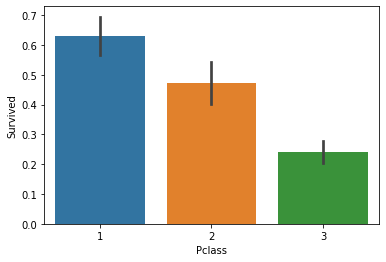

In [14]:
sns.barplot(data=train_data,x='Pclass',y='Survived')

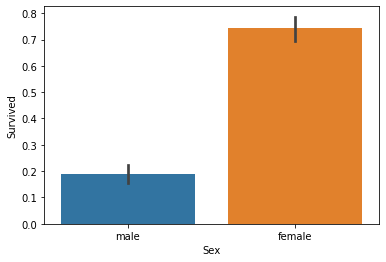

In [15]:
sns.barplot(data=train_data,x='Sex',y='Survived')

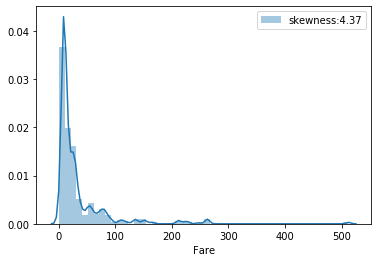

In [16]:
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [17]:
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)

In [18]:
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [19]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [20]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
full['Embarked']=full['Embarked'].fillna('S')

In [22]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Jonkheer          1
Dona              1
Mme               1
Don               1
Lady              1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [24]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr


In [25]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'
full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()


Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

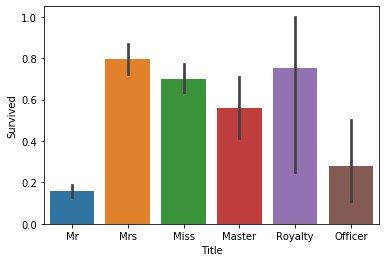

In [26]:
sns.barplot(data=full,x='Title',y='Survived')

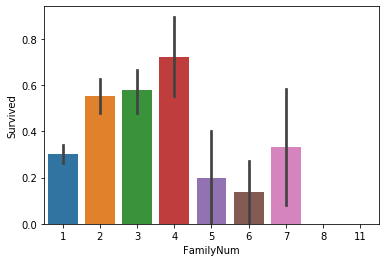

In [27]:
full['FamilyNum']=full['Parch']+full['SibSp']+1
sns.barplot(data=full,x='FamilyNum',y='Survived')

In [28]:
def familysize (familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else: 
        return 2
full['familySize']=full['FamilyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

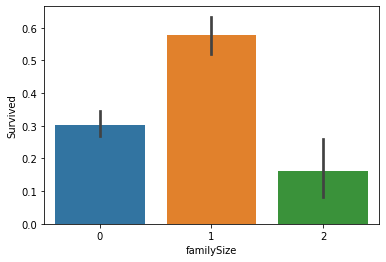

In [29]:
sns.barplot(data=full,x='familySize',y='Survived')

In [30]:
train_data.Embarked[train_data.Embarked.isnull()]=train_data.Embarked.dropna().mode().values

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train_data['Cabin']=train_data.Cabin.fillna('U0')

In [32]:
from sklearn.ensemble import RandomForestRegressor

age_df=train_data[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df_notnull=age_df.loc[(train_data['Age'].notnull())]
age_df_isnull=age_df.loc[(train_data['Age'].isnull())]

X=age_df_notnull.values[:,1:]
Y=age_df_notnull.values[:,0]

RFR=RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)

predictAges=RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(),['Age']]=predictAges

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

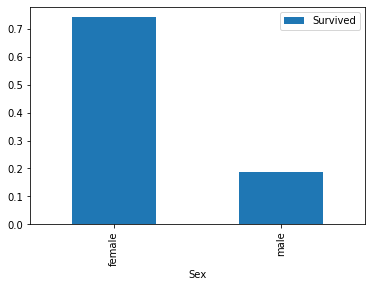

In [35]:
train_data[['Sex','Survived']].groupby('Sex').mean().plot.bar()

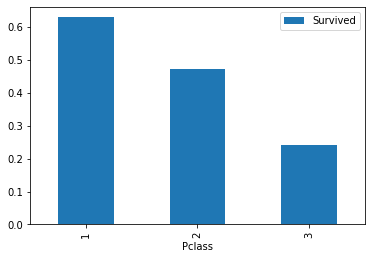

In [36]:
train_data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

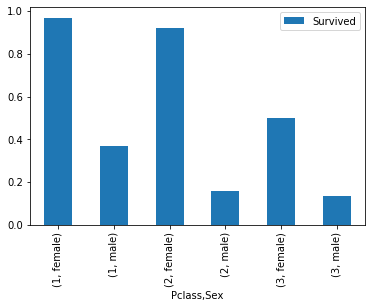

In [37]:
train_data[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [38]:
train_data['Age'].describe()

count    891.000000
mean      29.666727
std       13.733659
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
bins=[0,12,18,65,100]
train_data['Age_group']=pd.cut(train_data['Age'],bins)
by_age=train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

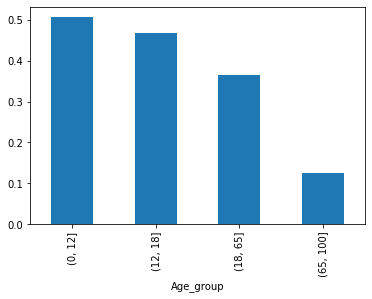

In [40]:
by_age.plot(kind='bar')

In [41]:
train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


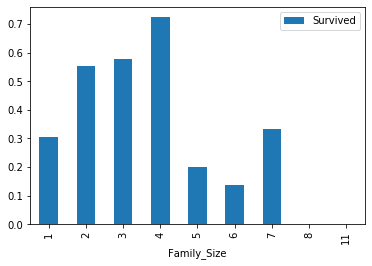

In [42]:
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

In [43]:
embark_dummies=pd.get_dummies(train_data['Embarked'])
train_data=train_data.join(embark_dummies)
train_data.drop(['Embarked'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_group,Title,Family_Size,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,"(18, 65]",Mr,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,"(18, 65]",Mrs,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,"(18, 65]",Miss,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,"(18, 65]",Mrs,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,"(18, 65]",Mr,1,0,0,1


In [44]:
embark_dummies=train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [45]:
train_data['Cabin'][train_data.Cabin.isnull()]='U0'
train_data['CabinLetter']=train_data['Cabin'].map(lambda x:re.compile('([a-zA-Z]+)').search(x).group())
train_data['CabinLetter']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: CabinLetter, Length: 891, dtype: object

In [46]:
train_data['CabinLetter']=pd.factorize(train_data['CabinLetter'])[0]
train_data['CabinLetter']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    6
888    0
889    1
890    0
Name: CabinLetter, Length: 891, dtype: int64

In [47]:
from sklearn import preprocessing
assert np.size(train_data['Age'])==891
scaler=preprocessing.StandardScaler()
train_data['Age_scaled']=scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [48]:
train_data['Age_scaled'].head()

0   -0.558557
1    0.607118
2   -0.267138
3    0.388554
4    0.388554
Name: Age_scaled, dtype: float64

In [49]:
train_data['Fare_bin']=pd.qcut(train_data['Fare'],5)
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [50]:
fare_bin_dummies_df=pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x:'Fare_'+str(x))
train_data=pd.concat([train_data,fare_bin_dummies_df],axis=1)

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,CabinLetter,Age_scaled,Fare_bin,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,-0.558557,"(-0.001, 7.854]",1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0.607118,"(39.688, 512.329]",0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,-0.267138,"(7.854, 10.5]",0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,1,0.388554,"(39.688, 512.329]",0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0.388554,"(7.854, 10.5]",0,1,0,0,0


In [52]:
train_df_org=pd.read_csv('train.csv')
test_df_org=pd.read_csv('test.csv')
test_df_org['Survived']=0
combined_train_test=train_df_org.append(test_df_org)
PassengerId=test_df_org['PassengerId'].values

In [53]:
PassengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [54]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)

In [55]:
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
emb_dummies_df=pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test=pd.concat([combined_train_test,emb_dummies_df],axis=1)

In [56]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,0,0


In [57]:
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [58]:
combined_train_test['Title']=combined_train_test['Name'].map(lambda x:re.compile(", (.*?\.)").findall(x)[0])

In [59]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,Mr.


In [60]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [61]:
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

In [62]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Title,Title_-1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,-1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,-1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1,-1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1,-1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,-1,1


In [63]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [64]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [65]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [66]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

In [67]:
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)
combined_train_test.drop(['Fare_bin'], axis=1, inplace=True)

In [68]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_1,Title,Title_-1,Name_length,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25000,...,0,-1,1,23,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,35.64165,...,1,-1,1,51,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.92500,...,1,-1,1,22,2,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,26.55000,...,1,-1,1,44,1,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05000,...,0,-1,1,24,2,0,0,1,0,0


In [69]:
from sklearn.preprocessing import LabelEncoder

def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]

combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare), axis=1)
pclass_level = LabelEncoder()

pclass_level.fit(np.array(['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low', 'Pclass3_High']))

combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])

pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)

combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]


In [70]:
def family_size_category(family_size):
    if family_size<=1:
        return 'Single'
    elif family_size<=4:
        return 'Small_Family'
    else:
        return 'Large_Family'
combined_train_test['Family_Size']=combined_train_test['Parch']+combined_train_test['SibSp']+1
combined_train_test['Family_Size_Category']=combined_train_test['Family_Size'].map(family_size_category)

le_family=LabelEncoder()
le_family.fit(np.array(['Single','Small_Family','Large_Family']))
combined_train_test['Family_Size_Category']=le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                     prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [71]:
combined_train_test['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 1309, dtype: int64

In [72]:
missing_age_df = pd.DataFrame(combined_train_test[
 ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [73]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
    
    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [74]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [75]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [76]:
combined_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25000,...,0,0,0,1,2,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,35.64165,...,0,0,0,0,2,2,0,0,1,1
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.92500,...,0,0,1,0,1,1,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,26.55000,...,0,0,0,0,2,2,0,0,1,3
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05000,...,0,0,1,0,1,1,0,1,0,3


In [77]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   10.6s remaining:   10.6s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   12.4s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-157.30016603661875
GB Train Error for "Age" Feature Regressor:-76.702699396346
5     36.422375
17    32.956316
19    22.374690
26    28.600573
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    3.6s fini

Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-146.14337701951771
RF Train Error for "Age" Feature Regressor-116.50268319784635
5     31.001134
17    33.725938
19    25.427105
26    27.893547
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     29.740301
17    29.740301
19    29.740301
26    29.740301
Name: Age, dtype: float64


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [78]:
Correlation = pd.DataFrame(combined_train_test[
 ['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass', 
  'Pclass_Fare_Category', 'Age', 'Ticket_Letter', 'Cabin']])

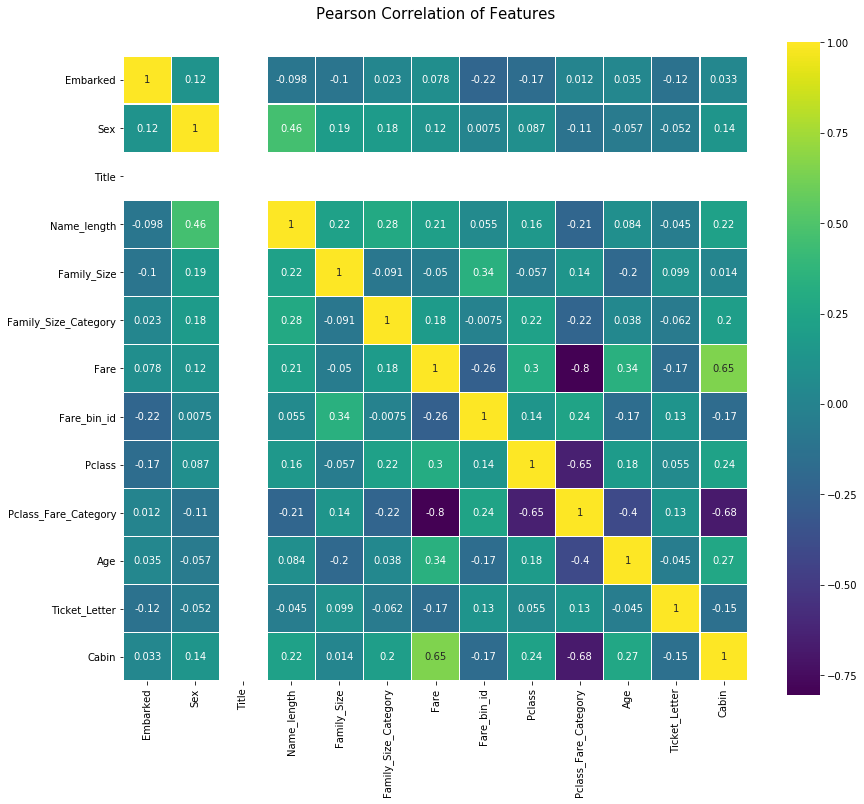

In [79]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [80]:
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length']])
combined_train_test[['Age','Fare', 'Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare', 'Name_length']])

In [81]:
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 'Fare_bin_id', 'Pclass_Fare_Category', 
                       'Parch', 'SibSp', 'Family_Size_Category', 'Ticket'],axis=1,inplace=True)

In [82]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [83]:
titanic_train_data_X.shape

(891, 27)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):

    # random forest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))

    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    # ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [20]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [20]}
    gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': gb_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
    dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt], 
                               ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n , features_importance

In [85]:
feature_to_pick = 30
feature_top_n, feature_importance = get_top_n_features(titanic_train_data_X, titanic_train_data_Y, feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   13.2s remaining:    7.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   15.6s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8249687890137327
Top N Features RF Train Score:0.9820426487093153
Sample 10 Features from RF Classifier
1                        Age
10               Name_length
7                      Sex_0
8                      Sex_1
2                       Fare
22               Family_Size
0                     Pclass
26             Ticket_Letter
3                      Cabin
25    Family_Size_Category_2
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   10.4s remaining:    5.6s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   11.1s finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 500}
Top N Features Best Ada Score:0.8125967540574282
Top N Features Ada Train Score:0.8383838383838383
Sample 10 Feature from Ada Classifier:
1                        Age
10               Name_length
2                       Fare
26             Ticket_Letter
7                      Sex_0
22               Family_Size
8                      Sex_1
0                     Pclass
4                 Embarked_0
23    Family_Size_Category_0
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    8.8s remaining:    4.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    8.8s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best ET Score:0.8282771535580524
Top N Features ET Train Score:0.9730639730639731
Sample 10 Features from ET Classifier:
7                      Sex_0
8                      Sex_1
1                        Age
10               Name_length
2                       Fare
3                      Cabin
26             Ticket_Letter
0                     Pclass
25    Family_Size_Category_2
22               Family_Size
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   33.6s remaining:   18.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   36.5s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7733832709113608
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
7                      Sex_0
1                        Age
2                       Fare
10               Name_length
0                     Pclass
8                      Sex_1
3                      Cabin
25    Family_Size_Category_2
22               Family_Size
26             Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Best DT Params:{'max_depth': 20, 'min_samples_split': 2}
Top N Features Best DT Score:0.758789013732834
Top N Features DT Train Score:0.9921436588103255
Sample 10 Features from DT Classifier:
7                      Sex_0
1                        Age
2                       Fare
10               Name_length
0                     Pclass
3                      Cabin
22           

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.1s finished


In [86]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from Gradient Boosting regression
pos = np.arange(rf_important_idx.shape[0]) + .5

In [87]:
#rf_feature_importance.shape
rf_important_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

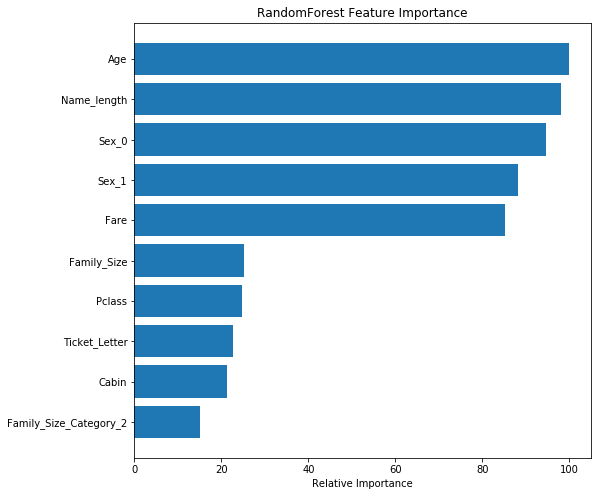

In [88]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from Gradient Boosting regression
pos = np.arange(rf_important_idx.shape[0]) + .5
plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

# plt.subplot(122)
# plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
# plt.yticks(pos, Ada_feature_imp['feature'][::-1])
# plt.xlabel('Relative Importance')
# plt.title('AdaBoost Feature Importance')

plt.show()

In [89]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS, random_state=SEED, shuffle=False)

def get_out_fold(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=6, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=8, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

dt = DecisionTreeClassifier(max_depth=8)

knn = KNeighborsClassifier(n_neighbors = 2)

svm = SVC(kernel='linear', C=0.025)

In [91]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values # Creates an array of the train data
x_test = titanic_test_data_X.values # Creats an array of the test data
y_train = titanic_train_data_Y.values

In [92]:
# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost 
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector

print("Training is complete")

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarn

Training is complete


In [93]:
x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train, gb_oof_train, dt_oof_train, knn_oof_train, svm_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test, gb_oof_test, dt_oof_test, knn_oof_test, svm_oof_test), axis=1)

In [94]:
from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [95]:

StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

In [96]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [97]:
X = x_train
Y = y_train

# RandomForest
rf_parameters = {'n_jobs': -1, 'n_estimators': 500, 'warm_start': True, 'max_depth': 6, 'min_samples_leaf': 2, 
              'max_features' : 'sqrt','verbose': 0}

# AdaBoost
ada_parameters = {'n_estimators':500, 'learning_rate':0.1}

# ExtraTrees
et_parameters = {'n_jobs': -1, 'n_estimators':500, 'max_depth': 8, 'min_samples_leaf': 2, 'verbose': 0}

# GradientBoosting
gb_parameters = {'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 2, 'verbose': 0}

# DecisionTree
dt_parameters = {'max_depth':8}

# KNeighbors
knn_parameters = {'n_neighbors':2}

# SVM
svm_parameters = {'kernel':'linear', 'C':0.025}

# XGB
gbm_parameters = {'n_estimators': 2000, 'max_depth': 4, 'min_child_weight': 2, 'gamma':0.9, 'subsample':0.8, 
               'colsample_bytree':0.8, 'objective': 'binary:logistic', 'nthread':-1, 'scale_pos_weight':1}

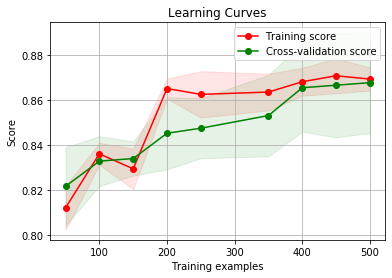

In [98]:
title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters), title, X, Y, cv=None,  n_jobs=4, train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500])
plt.show()